In [1]:
# package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.metrics import r2_score
import csv
import math

In [2]:
# import data
file1 = 'combined_data.csv'
df1 = pd.read_csv(file1)

In [3]:
df1

,Unnamed: 0,Unnamed: 0.1,Year,County,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error,% of Total Deaths,Divorce Count,education: less_than_high_school,household: foster_kids,household: people_living_alone,household: in_group_quarters,household: nonrelatives_in_nonfamily_households
0,0,0,2015,Adams County,13,22006,Unreliable,31.5,101.0,16.4,0.10%,119.0,4567,4,2986,382,1215
1,1,1,2015,Allen County,21,82914,25.3,15.7,38.7,5.5,0.10%,326.0,9260,0,11468,3917,3970
2,2,2,2015,Ashtabula County,24,79192,30.3,19.4,45.1,6.2,0.10%,344.0,12061,54,11345,3502,3908
3,3,3,2015,Belmont County,18,57540,Unreliable,18.5,49.4,7.4,0.10%,229.0,6322,19,8644,4044,1932
4,4,4,2015,Brown County,26,34930,74.4,48.6,109.1,14.6,0.10%,168.0,5160,12,3886,581,1564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,245,2019,Tuscarawas County,15,73440,Unreliable,11.4,33.7,5.3,0.10%,305.0,10455,62,10183,1092,1991
246,246,246,2019,Warren County,48,185077,25.9,19.1,34.4,3.7,0.20%,681.0,12201,109,17158,7685,3094
247,247,247,2019,Washington County,11,49557,Unreliable,11.1,39.7,6.7,0.10%,241.0,4773,23,7608,1660,1037
248,248,248,2019,Wayne County,24,90983,26.4,16.9,39.2,5.4,0.10%,264.0,12489,173,12045,4101,1975


In [4]:
# log transformation
df1["log_Deaths"] = df1["Deaths"].apply(np.log10)
df1["log_Population"] = df1["Population"].apply(np.log10)
df1["log_Divorce Count"] = df1["Divorce Count"].apply(np.log10)
df1["log_household: nonrelatives_in_nonfamily_households"] = df1["household: nonrelatives_in_nonfamily_households"].apply(np.log10)
df1["log_household: people_living_alone"] = df1["household: people_living_alone"].apply(np.log10)
df1["log_education: less_than_high_school"] = df1["education: less_than_high_school"].apply(np.log10)
df1["log_household: foster_kids"] = df1["household: foster_kids"].apply(np.log10)
df1["log_household: in_group_quarters"] = df1["household: in_group_quarters"].apply(np.log10)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 25 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           250 non-null    int64  
 1   Unnamed: 0.1                                         250 non-null    int64  
 2   Year                                                 250 non-null    int64  
 3   County                                               250 non-null    object 
 4   Deaths                                               250 non-null    int64  
 5   Population                                           250 non-null    int64  
 6   Crude Rate                                           250 non-null    object 
 7   Crude Rate Lower 95% Confidence Interval             250 non-null    float64
 8   Crude Rate Upper 95% Confidence Interval             250 non-null    f

pd_data.head(10) = 
   Unnamed: 0  Unnamed: 0.1  Year             County  Deaths  Population  \
0           0             0  2015       Adams County      13       22006   
1           1             1  2015       Allen County      21       82914   
2           2             2  2015   Ashtabula County      24       79192   
3           3             3  2015     Belmont County      18       57540   
4           4             4  2015       Brown County      26       34930   
5           5             5  2015      Butler County     201      296652   
6           6             6  2015       Clark County      78      108703   
7           7             7  2015    Clermont County     104      159508   
8           8             8  2015     Clinton County      22       33175   
9           9             9  2015  Columbiana County      32       85642   

   Crude Rate  Crude Rate Lower 95% Confidence Interval  \
0  Unreliable                                      31.5   
1        25.3            

/Users/gezhicheng/opt/anaconda3/lib/python3.8/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/gezhicheng/opt/anaconda3/lib/python3.8/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
/Users/gezhicheng/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


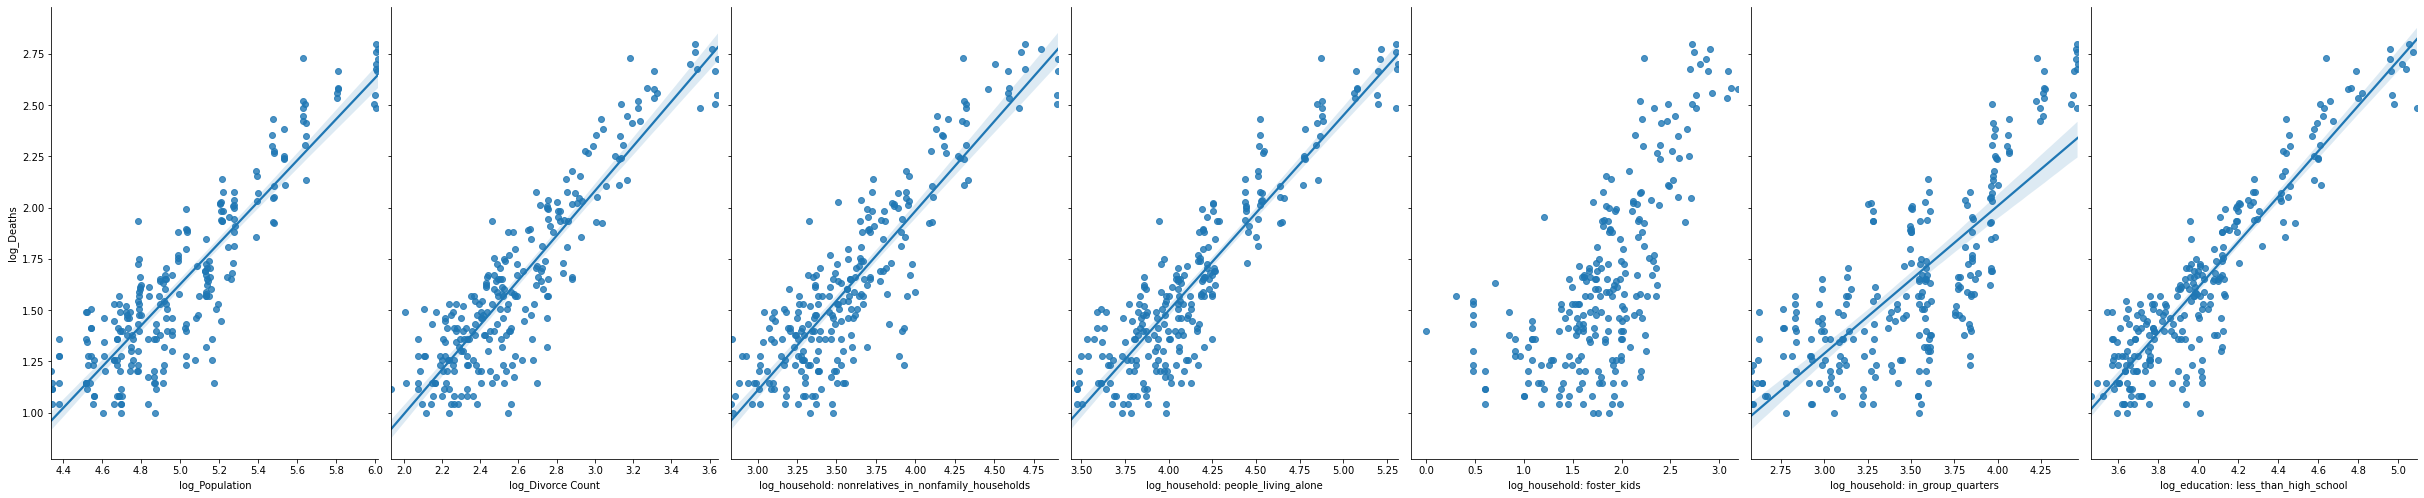

In [6]:
# check the scatter plot
pd_data = df1
print('pd_data.head(10) = \n{}'.format(pd_data.head(10)))
sns.pairplot(pd_data, x_vars=['log_Population', 'log_Divorce Count','log_household: nonrelatives_in_nonfamily_households', 'log_household: people_living_alone', 'log_household: foster_kids', 'log_household: in_group_quarters', 'log_education: less_than_high_school'], y_vars = 'log_Deaths', kind = 'reg', height = 7, aspect = 0.7)
plt.savefig("scatter_plot_log1.jpg")
plt.show()


In [7]:
# oops!error!
# because there are some "0" values in "household: foster_kid" feature
# log10(0) is minus infinity!

In [8]:
df1

,Unnamed: 0,Unnamed: 0.1,Year,County,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error,...,household: in_group_quarters,household: nonrelatives_in_nonfamily_households,log_Deaths,log_Population,log_Divorce Count,log_household: nonrelatives_in_nonfamily_households,log_household: people_living_alone,log_education: less_than_high_school,log_household: foster_kids,log_household: in_group_quarters
0,0,0,2015,Adams County,13,22006,Unreliable,31.5,101.0,16.4,...,382,1215,1.113943,4.342541,2.075547,3.084576,3.475090,3.659631,0.602060,2.582063
1,1,1,2015,Allen County,21,82914,25.3,15.7,38.7,5.5,...,3917,3970,1.322219,4.918628,2.513218,3.598791,4.059488,3.966611,-inf,3.592954
2,2,2,2015,Ashtabula County,24,79192,30.3,19.4,45.1,6.2,...,3502,3908,1.380211,4.898681,2.536558,3.591955,4.054805,4.081383,1.732394,3.544316
3,3,3,2015,Belmont County,18,57540,Unreliable,18.5,49.4,7.4,...,4044,1932,1.255273,4.759970,2.359835,3.286007,3.936715,3.800854,1.278754,3.606811
4,4,4,2015,Brown County,26,34930,74.4,48.6,109.1,14.6,...,581,1564,1.414973,4.543199,2.225309,3.194237,3.589503,3.712650,1.079181,2.764176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,245,2019,Tuscarawas County,15,73440,Unreliable,11.4,33.7,5.3,...,1092,1991,1.176091,4.865933,2.484300,3.299071,4.007876,4.019324,1.792392,3.038223
246,246,246,2019,Warren County,48,185077,25.9,19.1,34.4,3.7,...,7685,3094,1.681241,5.267352,2.833147,3.490520,4.234467,4.086395,2.037426,3.885644
247,247,247,2019,Washington County,11,49557,Unreliable,11.1,39.7,6.7,...,1660,1037,1.041393,4.695105,2.382017,3.015779,3.881271,3.678791,1.361728,3.220108
248,248,248,2019,Wayne County,24,90983,26.4,16.9,39.2,5.4,...,4101,1975,1.380211,4.958960,2.421604,3.295567,4.080807,4.096528,2.238046,3.612890


parameters of training set and test set:
x_train.shape=(200, 6)
 x_test.shape=(200,)
, y_test.shape=(50, 6)
parameters of model:
LinearRegression()
model intercept
-1.917615521170777
parameter weights
[-0.37914345  0.20529684  0.11066862  0.3787222   0.0539891   0.68587477]
RMSE: 0.16886435595537497
Rsquare score: 0.8403057792466415


<function matplotlib.pyplot.show(close=None, block=None)>

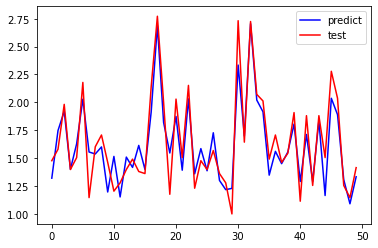

In [9]:
# Solution 1: train our model without "household: foster_kid" 
from sklearn.model_selection import train_test_split#cross-verification
from sklearn.linear_model import LinearRegression
x = pd_data.loc[:, ('log_Population', 'log_Divorce Count','log_household: nonrelatives_in_nonfamily_households', 'log_household: people_living_alone', 'log_household: in_group_quarters', 'log_education: less_than_high_school')]
y = pd_data.loc[:, 'log_Deaths']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 232)#set 20% of the data as test set
print('parameters of training set and test set:')
print('x_train.shape={}\n x_test.shape={}\n, y_test.shape={}'.format(x_train.shape, y_train.shape, x_test.shape,y_test.shape))

linreg = LinearRegression()
model = linreg.fit(x_train, y_train)
print('parameters of model:')
print(model)
print('model intercept')
print(linreg.intercept_)
print('parameter weights')
print(linreg.coef_)

y_pred = linreg.predict(x_test)
sum_mean = 0
for i in range(len(y_pred)):
    sum_mean += (y_pred[i] - y_test.values[i]) **2
sum_erro = np.sqrt(sum_mean/len(y_pred))#the scale of test set

#calculate RMSE
print('RMSE:', sum_erro)

#calculate Rsquare score
print('Rsquare score:', r2_score(y_test,y_pred))

# plot ROC
plt.figure()
plt.plot(range(len(y_pred)), y_pred, 'b', label = 'predict')
plt.plot(range(len(y_pred)), y_test, 'r', label = 'test')
plt.legend(loc='upper right')
plt.show


end


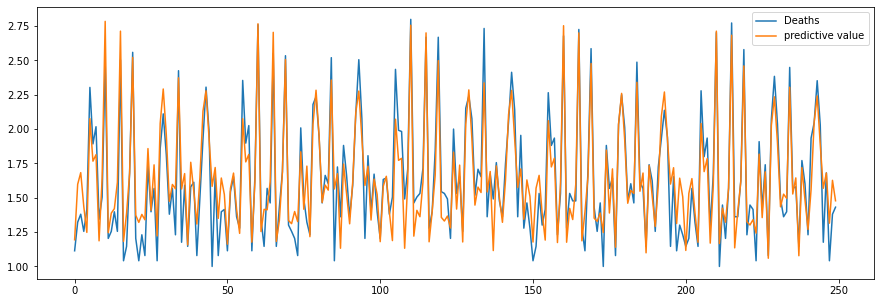

In [10]:
# total set
pd_data = df1
sam = []
a = ['log_Deaths', 'log_Population', 'log_Divorce Count','log_household: nonrelatives_in_nonfamily_households', 'log_household: people_living_alone', 'log_household: in_group_quarters', 'log_education: less_than_high_school']
dic={}
for i in a:
    y = pd_data.loc[:,i]
    dic[i] = list(y)
for i in range(len(dic['log_Deaths'])):
    x = -1.8076284103979925 + float(dic['log_Population'][i]) * (-0.3901878) + float(dic['log_Divorce Count'][i]) * 0.21042677 + float(dic['log_household: nonrelatives_in_nonfamily_households'][i]) * 0.10722726 + float(dic['log_household: people_living_alone'][i]) * 0.38773294 + float(dic['log_household: in_group_quarters'][i]) * (0.04830405) + float(dic['log_education: less_than_high_school'][i]) * (0.67124225)
    sam.append(x)
    
with open('final_test_log.csv','w') as file:
    writer = csv.writer(file)
    writer.writerow(['Deaths','predictive value'])
    for i in range(len(sam)):
        writer.writerow([dic['log_Deaths'][i],sam[i]])
                         
print('end')
pd_data = pd.read_csv('final_test_log.csv')
pd_data.plot(figsize = (15,5))
plt.show()
    
    

In [11]:
#Solution 2: how about using log10(n+1)?
df2 = pd.read_csv(file1)
df2["Deaths_1"] = df2["Deaths"]+1
df2["Population_1"] = df2["Population"]+1
df2["Divorce Count_1"] = df2["Divorce Count"]+1
df2["household: nonrelatives_in_nonfamily_households_1"] = df2["household: nonrelatives_in_nonfamily_households"]+1
df2["household: people_living_alone_1"] = df2["household: people_living_alone"]+1
df2["education: less_than_high_school_1"] = df2["education: less_than_high_school"]+1
df2["household: foster_kids_1"] = df2["household: foster_kids"]+1
df2["household: in_group_quarters_1"] = df2["household: in_group_quarters"]+1

In [12]:
df2

,Unnamed: 0,Unnamed: 0.1,Year,County,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error,...,household: in_group_quarters,household: nonrelatives_in_nonfamily_households,Deaths_1,Population_1,Divorce Count_1,household: nonrelatives_in_nonfamily_households_1,household: people_living_alone_1,education: less_than_high_school_1,household: foster_kids_1,household: in_group_quarters_1
0,0,0,2015,Adams County,13,22006,Unreliable,31.5,101.0,16.4,...,382,1215,14,22007,120.0,1216,2987,4568,5,383
1,1,1,2015,Allen County,21,82914,25.3,15.7,38.7,5.5,...,3917,3970,22,82915,327.0,3971,11469,9261,1,3918
2,2,2,2015,Ashtabula County,24,79192,30.3,19.4,45.1,6.2,...,3502,3908,25,79193,345.0,3909,11346,12062,55,3503
3,3,3,2015,Belmont County,18,57540,Unreliable,18.5,49.4,7.4,...,4044,1932,19,57541,230.0,1933,8645,6323,20,4045
4,4,4,2015,Brown County,26,34930,74.4,48.6,109.1,14.6,...,581,1564,27,34931,169.0,1565,3887,5161,13,582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,245,2019,Tuscarawas County,15,73440,Unreliable,11.4,33.7,5.3,...,1092,1991,16,73441,306.0,1992,10184,10456,63,1093
246,246,246,2019,Warren County,48,185077,25.9,19.1,34.4,3.7,...,7685,3094,49,185078,682.0,3095,17159,12202,110,7686
247,247,247,2019,Washington County,11,49557,Unreliable,11.1,39.7,6.7,...,1660,1037,12,49558,242.0,1038,7609,4774,24,1661
248,248,248,2019,Wayne County,24,90983,26.4,16.9,39.2,5.4,...,4101,1975,25,90984,265.0,1976,12046,12490,174,4102


In [13]:
df2["log_Deaths"] = df2["Deaths_1"].apply(np.log10)
df2["log_Population"] = df2["Population_1"].apply(np.log10)
df2["log_Divorce Count"] = df2["Divorce Count_1"].apply(np.log10)
df2["log_household: nonrelatives_in_nonfamily_households"] = df2["household: nonrelatives_in_nonfamily_households_1"].apply(np.log10)
df2["log_household: people_living_alone"] = df2["household: people_living_alone_1"].apply(np.log10)
df2["log_education: less_than_high_school"] = df2["education: less_than_high_school_1"].apply(np.log10)
df2["log_household: foster_kids"] = df2["household: foster_kids_1"].apply(np.log10)
df2["log_household: in_group_quarters"] = df2["household: in_group_quarters_1"].apply(np.log10)

In [14]:
df2

,Unnamed: 0,Unnamed: 0.1,Year,County,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error,...,household: foster_kids_1,household: in_group_quarters_1,log_Deaths,log_Population,log_Divorce Count,log_household: nonrelatives_in_nonfamily_households,log_household: people_living_alone,log_education: less_than_high_school,log_household: foster_kids,log_household: in_group_quarters
0,0,0,2015,Adams County,13,22006,Unreliable,31.5,101.0,16.4,...,5,383,1.146128,4.342561,2.079181,3.084934,3.475235,3.659726,0.698970,2.583199
1,1,1,2015,Allen County,21,82914,25.3,15.7,38.7,5.5,...,1,3918,1.342423,4.918633,2.514548,3.598900,4.059526,3.966658,0.000000,3.593064
2,2,2,2015,Ashtabula County,24,79192,30.3,19.4,45.1,6.2,...,55,3503,1.397940,4.898687,2.537819,3.592066,4.054843,4.081419,1.740363,3.544440
3,3,3,2015,Belmont County,18,57540,Unreliable,18.5,49.4,7.4,...,20,4045,1.278754,4.759977,2.361728,3.286232,3.936765,3.800923,1.301030,3.606919
4,4,4,2015,Brown County,26,34930,74.4,48.6,109.1,14.6,...,13,582,1.431364,4.543211,2.227887,3.194514,3.589615,3.712734,1.113943,2.764923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,245,2019,Tuscarawas County,15,73440,Unreliable,11.4,33.7,5.3,...,63,1093,1.204120,4.865939,2.485721,3.299289,4.007918,4.019366,1.799341,3.038620
246,246,246,2019,Warren County,48,185077,25.9,19.1,34.4,3.7,...,110,7686,1.690196,5.267355,2.833784,3.490661,4.234492,4.086431,2.041393,3.885700
247,247,247,2019,Washington County,11,49557,Unreliable,11.1,39.7,6.7,...,24,1661,1.079181,4.695114,2.383815,3.016197,3.881328,3.678882,1.380211,3.220370
248,248,248,2019,Wayne County,24,90983,26.4,16.9,39.2,5.4,...,174,4102,1.397940,4.958965,2.423246,3.295787,4.080843,4.096562,2.240549,3.612996


parameters of training set and test set:
x_train.shape=(200, 7)
 x_test.shape=(200,)
, y_test.shape=(50, 7)
parameters of model:
LinearRegression()
model intercept
-1.8407802934686484
parameter weights
[-0.38372488  0.20998431  0.10532798 -0.00730547  0.38632205  0.04872392
  0.67772021]
RMSE: 0.16263913897145318
Rsquare score: 0.8458612745484706


<function matplotlib.pyplot.show(close=None, block=None)>

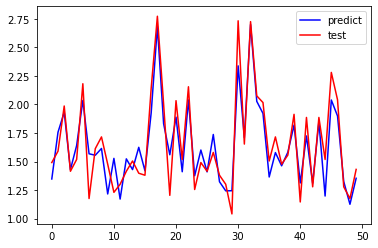

In [15]:
from sklearn.model_selection import train_test_split#cross-verification
from sklearn.linear_model import LinearRegression

x = df2.loc[:, ('log_Population', 'log_Divorce Count','log_household: nonrelatives_in_nonfamily_households',"log_household: foster_kids", 'log_household: people_living_alone', 'log_household: in_group_quarters', 'log_education: less_than_high_school')]
y = df2.loc[:, 'log_Deaths']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 232)#set 20% of the data as test set
print('parameters of training set and test set:')
print('x_train.shape={}\n x_test.shape={}\n, y_test.shape={}'.format(x_train.shape, y_train.shape, x_test.shape,y_test.shape))

linreg = LinearRegression()
model2 = linreg.fit(x_train, y_train)
print('parameters of model:')
print(model2)
print('model intercept')
print(linreg.intercept_)
print('parameter weights')
print(linreg.coef_)

y_pred = linreg.predict(x_test)
sum_mean = 0
for i in range(len(y_pred)):
    sum_mean += (y_pred[i] - y_test.values[i]) **2
sum_erro = np.sqrt(sum_mean/len(y_pred))#the scale of test set

#calculate RMSE
print('RMSE:', sum_erro)

#calculate Rsquare score
print('Rsquare score:', r2_score(y_test,y_pred))

# plot ROC
plt.figure()
plt.plot(range(len(y_pred)), y_pred, 'b', label = 'predict')
plt.plot(range(len(y_pred)), y_test, 'r', label = 'test')
plt.legend(loc='upper right')
plt.savefig("predict_log.jpg")
plt.show



end


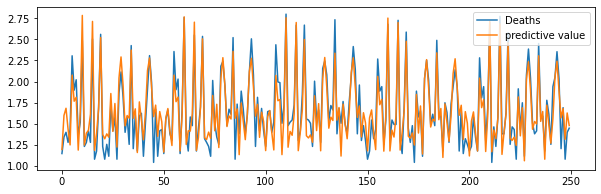

In [16]:
# total set
pd_data = df2
sam = []
a = ['log_Deaths', 'log_Population', 'log_Divorce Count','log_household: nonrelatives_in_nonfamily_households', 'log_household: people_living_alone', 'log_household: in_group_quarters', 'log_education: less_than_high_school']
dic={}
for i in a:
    y = pd_data.loc[:,i]
    dic[i] = list(y)
for i in range(len(dic['log_Deaths'])):
    x = -1.8076284103979925 + float(dic['log_Population'][i]) * (-0.3901878) + float(dic['log_Divorce Count'][i]) * 0.21042677 + float(dic['log_household: nonrelatives_in_nonfamily_households'][i]) * 0.10722726 + float(dic['log_household: people_living_alone'][i]) * 0.38773294 + float(dic['log_household: in_group_quarters'][i]) * (0.04830405) + float(dic['log_education: less_than_high_school'][i]) * (0.67124225)
    sam.append(x)
    
with open('final_test_log.csv','w') as file:
    writer = csv.writer(file)
    writer.writerow(['Deaths','predictive value'])
    for i in range(len(sam)):
        writer.writerow([dic['log_Deaths'][i],sam[i]])
                         
print('end')
pd_data = pd.read_csv('final_test_log.csv')
pd_data.plot(figsize = (10,3))
plt.legend(loc='upper right')
plt.show()
 